# Non-linear Pendulum

#### Zain Naqavi

This code will solve simultaneous differential equations for a non linear pendulum and animate the solutions for a damped and undamped pendulum.
$$$$
Overview:
* [Runge-Kutta method](#1)
* [General non-linear pendulum](#2)
* [Small angle approximation](#3)
* [Damped pendulum system](#4)
* [Animation](#5)

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

### <a id="1"></a> Runge Kutta

The fourth-order Runge-Kutta method is used to solve the differential equations in this program. It has the following equations:
$$
k_1 = h {\mathbf f}(\mathbf{r},t), \\
k_2 = h {\mathbf f}(\mathbf{r}+\frac{1}{2}k_1, t+\frac{1}{2}h), \\
k_3 = h {\mathbf f}(\mathbf{r}+\frac{1}{2}k_2, t+\frac{1}{2}h), \\
k_4 = h {\mathbf f}(\mathbf{r}+k_3, t+h), \\
\mathbf{r}(t+h) = \mathbf{r}(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$
where $\mathbf{r}=(x,y)$ is a two-dimensional vector.

In [2]:
def RungeKutta2d(r,tpoints,function):
    '''Fourth-order Runge-Kutta for two simultaneous equations
    Inputs: r: array of values, one for each equation in the system
            tpoints: array of time values.
            function: the function to use to solve the system
    Outputs: [xpoints, ypoints]: solutions for x(t) and y(t), arrays of same length as tpoints'''
    
    # initialise empty arrays
    xpoints = []
    ypoints = []
    
    # loop over all elements in tpoints
    for t in tpoints:
        
        # initial conditions
        xpoints.append(r[0])
        ypoints.append(r[1])
        
        # Runge-Kutta equations
        k1 = h*function(r,t) 
        k2 = h*function(r+0.5*k1, t+0.5*h)
        k3 = h*function(r+0.5*k2, t+0.5*h)
        k4 = h*function(r+k3, t+h)
        
        # calculate value of r for timepoint t
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
        
    return np.array([xpoints, ypoints]) # numpy array with 2 rows and N columns

In [3]:
# Set up parameters

tstart = 0.0   # start time
tend = 20.0    # end time
N = 1000       # number of points for Runge-Kutta

h = (tend - tstart)/N   # step length

# define an array of timepoints
tpoints = np.arange(tstart, tend, h)

# define the initial conditions in an array (t = 0, theta = 0.99pi,  omega = 0)
r = np.array([0.99*np.pi, 0.0])

## <a id="2"></a> Non- linear pendulum
The general equations of motion for a pendulum are:
$$
\frac{d \theta}{d t} = \omega
$$

$$
\frac{d \omega}{dt} = -\frac{g}{L}\sin\theta
$$
where $\theta$ is the angular displacement and $\omega$ is the angular velocity of a pendulum with length $L$. 

<IPython.core.display.Javascript object>


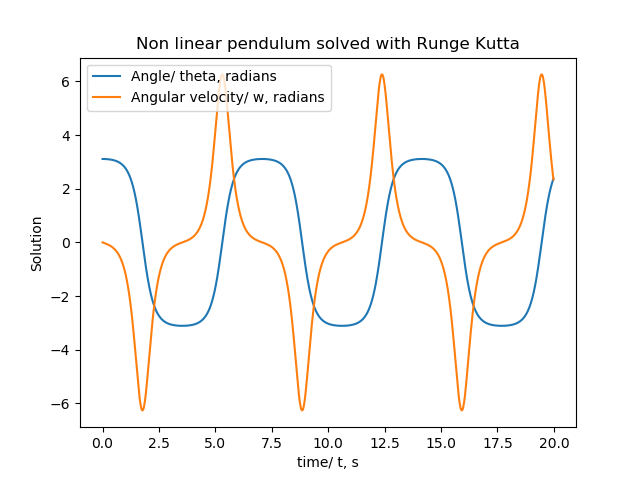

In [4]:
# define simultaneous differential equations
def function(r, t):
    '''Definition of the vector function to be solved
    Inputs are r (a vector of theta and omega) and t '''
    
    theta = r[0]   # first element of r represents theta
    omega = r[1]   # second element of r represents omega
    
    ftheta = omega                      # first ODE d(theta)/dt
    fomega = (-g / L) * np.sin(theta)   # second ODE d(omega)/dt
    
    # return ODEs as a float array
    return np.array([ ftheta, fomega ], float)


# define constants for function
L = 1
g = 9.81

# array of x and y solutions for function()
rsol = RungeKutta2d(r,tpoints,function) 


# Plot
plt.figure()
plt.plot(tpoints,rsol[0],label="Angle/ theta, radians")        # the first row of rsol
plt.plot(tpoints,rsol[1],label="Angular velocity/ w, radians") # the second row of rsol
plt.legend(loc="best")
plt.title("Non linear pendulum solved with Runge Kutta")
plt.xlabel("time/ t, s")
plt.ylabel("Solution");

## <a id="3"></a> Small angle approximation
This section will compare the general solutions above with those obtained using the approximation $\sin \theta \approx \theta$.

<IPython.core.display.Javascript object>


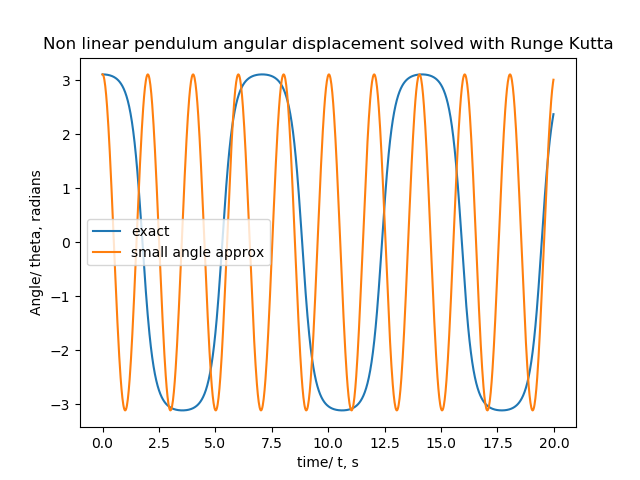

<IPython.core.display.Javascript object>


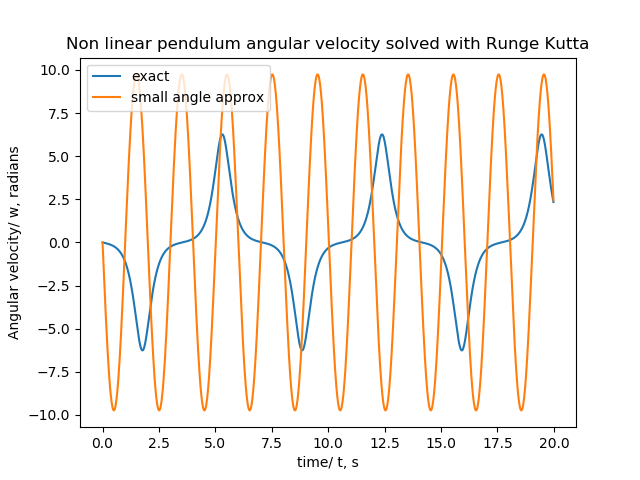

In [5]:
# new simultaneous differential equations for small angle approximation
def approx_function(r,t):
    '''Definition of the vector function to be solved
    Inputs are r (a vector of x and y) and t'''
    
    theta = r[0]   # first element of r represents theta
    omega = r[1]   # second element of r represents omega
    
    ftheta = omega              # first ODE d(theta)/dt
    fomega = (-g / L) * theta   # second ODE d(omega)/dt
    
    # return ODEs as a float array
    return np.array([ ftheta, fomega ], float)


# array of x and y solutions for approx_function()
rsol_approx = RungeKutta2d(r,tpoints,approx_function) 


# Plot comparing angles (using first row of rsol)
plt.figure()
plt.plot(tpoints,rsol[0],label="exact")
plt.plot(tpoints,rsol_approx[0],label="small angle approx")
plt.legend(loc="best")
plt.title("Non linear pendulum angular displacement solved with Runge Kutta")
plt.xlabel("time/ t, s")
plt.ylabel("Angle/ theta, radians");

# Plot comparing angular velocities (using second row of rsol)
plt.figure()
plt.plot(tpoints,rsol[1],label="exact")
plt.plot(tpoints,rsol_approx[1],label="small angle approx")
plt.legend(loc="best")
plt.title("Non linear pendulum angular velocity solved with Runge Kutta")
plt.xlabel("time/ t, s")
plt.ylabel("Angular velocity/ w, radians");

### Note
The above graphs show that the small angle approximate solutions have a continuous high frequency.

## <a id="4"></a> Damped system
This section will consider a damped system and compare it to the general undamped solutions above.

The expression for the angular acceleration for a damped sytem is:
$$
\frac{d \omega}{dt}  = -\frac{g}{L}\sin(\theta)  - \frac{c \omega}{M L^2}
$$
where $c$ is the dapming coefficient and $M$ is the mass of the pendulum.

<IPython.core.display.Javascript object>


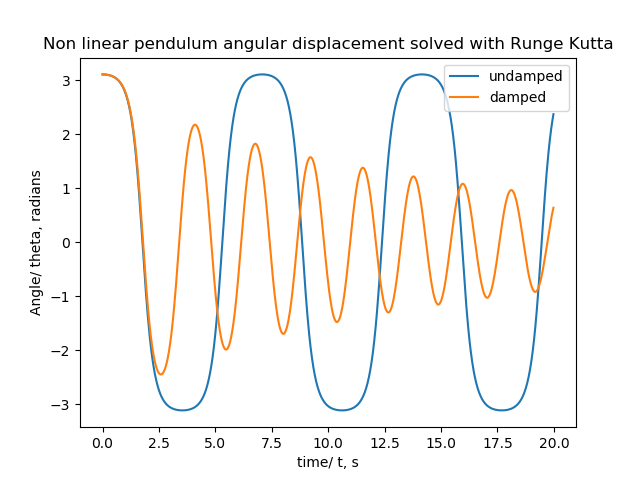

<IPython.core.display.Javascript object>


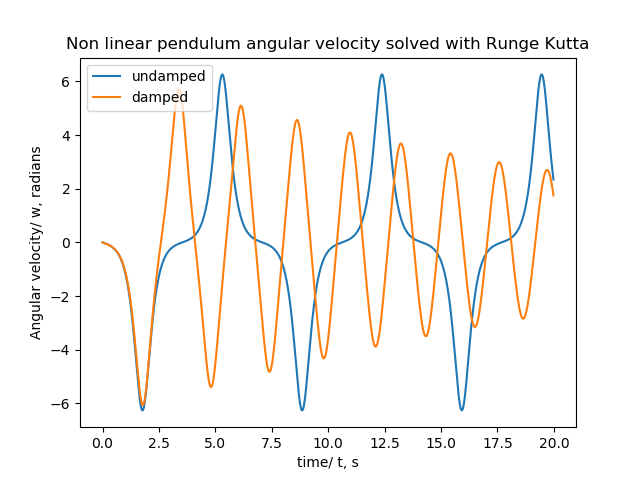

In [6]:
# new simultaneous differential equations accounting for damping force
def damp_function(r,t):
    '''Definition of the vector function to be solved
    Inputs are r (a vector of theta and omega) and t'''
    
    theta = r[0]   # first element of r represents theta
    omega = r[1]   # second element of r represents omega
    
    ftheta = omega                                             # first ODE d(theta)/dt
    fomega = (-g / L) * np.sin(theta) - omega * c / (M*L**2)   # second ODE d(omega)/dt
    
    # return ODEs as a float array
    return np.array([ ftheta, fomega ], float)


# define constants for new function
M = 0.1
c = 0.01

# array of x and y solutions for damp_function()
rsol_damp = RungeKutta2d(r,tpoints,damp_function) 


# Plot comparing angles (using first row of rsol)
plt.figure()
plt.plot(tpoints,rsol[0],label="undamped")
plt.plot(tpoints,rsol_damp[0],label="damped")
plt.legend(loc="best")
plt.title("Non linear pendulum angular displacement solved with Runge Kutta")
plt.xlabel("time/ t, s")
plt.ylabel("Angle/ theta, radians");

# Plot comparing angular velocities (using second row of rsol)
plt.figure()
plt.plot(tpoints,rsol[1],label="undamped")
plt.plot(tpoints,rsol_damp[1],label="damped")
plt.legend(loc="best")
plt.title("Non linear pendulum angular velocity solved with Runge Kutta")
plt.xlabel("time/ t, s")
plt.ylabel("Angular velocity/ w, radians");

### Note
The above graphs show that the amplitude of the damped solutions decrease over time as expected.

## <a id="5"></a> Animation
This section will animate the solutions for the damped and undamped pendulum systems and output graphs of angular displacement and velocity against time and phase space.

In [7]:
from vpython import sphere, cylinder, color, rate, vector, gcurve, canvas, graph

### Set up the animation window ###

win=450   # canvas window size parameter
animation = canvas( width=win, height=win, align='left')

pivot = vector(0,0,0)      # pendulum pivot point at centre of display
initialtheta = 0.5*np.pi   # initial angular displacement

# Set up pendulum (rod and bob) for the undamped system
rod = cylinder(pos=pivot, axis = vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.01, color=color.green, opacity = 0.5)
bob = sphere(pos=vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.1, color=color.blue, opacity = 0.5)

# Set up pendulum (rod and bob) for the damped system
rod_d = cylinder(pos=pivot, axis = vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.01, color=color.magenta)
bob_d = sphere(pos=vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.1, color=color.purple)


### Set up the graph windows ###

# angular displacement/velocity time graph
graph1 = graph(width=win, height=win/2, align="right",
      title='<b> θ (cyan), ω (red)</b>',
      xtitle='<i>time (s)</i>', ytitle='<i>θ (rads), ω (rads/s)</i>',
      foreground=color.black, background=color.white,
      xmin=0, xmax=20, ymin=-6, ymax=6)

# phase space graph
graph2 = graph(width=win, height=win/2, align="right",
      title='<b>Phase space: undamped (green), damped (magenta) </b>',
      xtitle='<i>θ (rads) </i>', ytitle='<i>ω (rads/s)</i>',
      foreground=color.black, background=color.white,
      xmin=-4, xmax=4, ymin=-7, ymax=7)

# set up the curve objects for the plots
anglecurve = gcurve(graph=graph1, color=color.cyan)          # a graphics curve for the angular displacement
velcurve = gcurve(graph=graph1, color=color.red)             # a graphics curve for the angular velocity
phasecurvedamp = gcurve(graph=graph2, color=color.magenta)   # a graphics phase space curve for the damped pendulum
phasecurveundamp = gcurve(graph=graph2, color=color.green)   # a graphics phase space curve for the undamped pendulum


### Run the animation ###

# Loop over the solutions calculated 
for i in range(0,N):
    
    ### Main vpython animation
    
    angle = rsol[0,i]         # undamped solution
    angle_d = rsol_damp[0,i]  # damped solution
    
    # update undamped system
    rod.axis = vector(L*np.sin(angle), -L*np.cos(angle), 0)   # change the axis of the bob
    bob.pos = vector(L*np.sin(angle), -L*np.cos(angle), 0)    # update the position of the bob
    
    # update damped system
    rod_d.axis = vector(L*np.sin(angle_d), -L*np.cos(angle_d), 0)   # change the axis of the bob
    bob_d.pos = vector(L*np.sin(angle_d), -L*np.cos(angle_d), 0)    # update the position of the bob
    

    ### Graph animations
    
    tpoint = i * tend / N   # scale the t-component manually
    
    # update graph of angular displacement against time
#    anglecurve.plot(tpoint, rsol[0,i])      # undamped system
    anglecurve.plot(tpoint, rsol_damp[0,i]) # damped system
    
    # update graph of angular velocity against time
#    velcurve.plot(tpoint, rsol[1,i])      # undamped system
    velcurve.plot(tpoint, rsol_damp[1,i]) # damped system

    # update graph of phase space
    phasecurveundamp.plot(rsol[0,i], rsol[1,i])           # undamped system
    phasecurvedamp.plot(rsol_damp[0,i], rsol_damp[1,i])   # damped system
    
    
    rate(50)   # framerate for all windows
    
print("End")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

End
